In [2]:
!pip install numpy matplotlib scikit-learn pillow

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [4]:
data = load_iris()
X = data['data'][:, (2, 3)]  # Petal length and width
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = (data['target'] == 2).astype(int).reshape(-1, 1)  # Binary classification

In [5]:
class ActivationFunction:
    def activate(self, x):
        raise NotImplementedError

    def derivative(self, x):
        raise NotImplementedError

class Sigmoid(ActivationFunction):
    def activate(self, x):
        return 1 / (1 + np.exp(-x))

    def derivative(self, x):
        return x * (1 - x)

class ReLU(ActivationFunction):
    def activate(self, x):
        return np.maximum(0, x)

    def derivative(self, x):
        return (x > 0).astype(float)


class MLPClassifier:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate, update_step=10):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.update_step = update_step


        self.hidden_activation = Sigmoid()
        self.output_activation = Sigmoid()


        self.weights = [np.random.randn(input_size, hidden_sizes[0]) * 0.1]
        self.biases = [np.zeros((1, hidden_sizes[0]))]
        for i in range(1, len(hidden_sizes)):
            self.weights.append(np.random.randn(hidden_sizes[i-1], hidden_sizes[i]) * 0.1)
            self.biases.append(np.zeros((1, hidden_sizes[i])))
        self.weights.append(np.random.randn(hidden_sizes[-1], output_size) * 0.1)
        self.biases.append(np.zeros((1, output_size)))

        self.observers = []

    def attach_observer(self, observer):
        self.observers.append(observer)

    def notify_observers(self, epoch):
        for observer in self.observers:
            observer.update(self, epoch)

    def forward(self, X):
        activations = [X]
        for i in range(len(self.hidden_sizes)):
            X = self.hidden_activation.activate(X @ self.weights[i] + self.biases[i])
            activations.append(X)
        X = self.output_activation.activate(X @ self.weights[-1] + self.biases[-1])
        activations.append(X)
        return activations

    def backward(self, X, y, activations):
        deltas = [activations[-1] - y]
        for i in range(len(self.hidden_sizes), 0, -1):
            deltas.append((deltas[-1] @ self.weights[i].T) * self.hidden_activation.derivative(activations[i]))
        deltas.reverse()

        grad_w = [activations[i].T @ deltas[i] / X.shape[0] for i in range(len(deltas))]
        grad_b = [np.sum(deltas[i], axis=0, keepdims=True) / X.shape[0] for i in range(len(deltas))]
        return grad_w, grad_b

    def update_parameters(self, grad_w, grad_b):
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * grad_w[i]
            self.biases[i] -= self.learning_rate * grad_b[i]

    def fit(self, X, y, epochs=1000):
        losses = []
        for epoch in range(epochs):
            activations = self.forward(X)
            loss = np.mean((activations[-1] - y) ** 2)
            losses.append(loss)
            grad_w, grad_b = self.backward(X, y, activations)
            self.update_parameters(grad_w, grad_b)
            if epoch % self.update_step == 0:
                self.notify_observers(epoch)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return losses

    def predict(self, X):
        return (self.forward(X)[-1] > 0.5).astype(int)


class DecisionBoundaryPlotter:
    def __init__(self, X, y, interval=10):
        self.X = X
        self.y = y
        self.interval = interval
        self.fig, self.ax = plt.subplots()

    def update(self, model, epoch):
        self.ax.clear()
        x_min, x_max = self.X[:, 0].min() - 1, self.X[:, 0].max() + 1
        y_min, y_max = self.X[:, 1].min() - 1, self.X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        preds = model.predict(grid).reshape(xx.shape)
        self.ax.contourf(xx, yy, preds, alpha=0.3)
        self.ax.scatter(self.X[:, 0], self.X[:, 1], c=self.y.ravel(), edgecolors='k')
        self.ax.set_title(f'Epoch {epoch}')
        plt.pause(0.1)

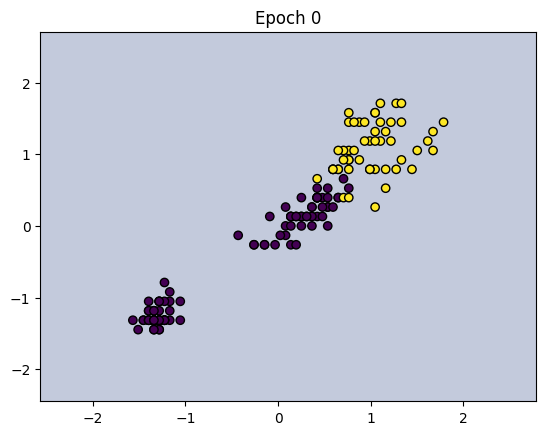

Epoch 0, Loss: 0.2507
Epoch 10, Loss: 0.2480
Epoch 20, Loss: 0.2456
Epoch 30, Loss: 0.2434
Epoch 40, Loss: 0.2415
Epoch 50, Loss: 0.2397
Epoch 60, Loss: 0.2381
Epoch 70, Loss: 0.2366
Epoch 80, Loss: 0.2353
Epoch 90, Loss: 0.2340
Epoch 100, Loss: 0.2330
Epoch 110, Loss: 0.2320
Epoch 120, Loss: 0.2311
Epoch 130, Loss: 0.2303
Epoch 140, Loss: 0.2295
Epoch 150, Loss: 0.2289
Epoch 160, Loss: 0.2283
Epoch 170, Loss: 0.2277
Epoch 180, Loss: 0.2272
Epoch 190, Loss: 0.2268
Epoch 200, Loss: 0.2264
Epoch 210, Loss: 0.2260
Epoch 220, Loss: 0.2257
Epoch 230, Loss: 0.2254
Epoch 240, Loss: 0.2251
Epoch 250, Loss: 0.2248
Epoch 260, Loss: 0.2246
Epoch 270, Loss: 0.2244
Epoch 280, Loss: 0.2242
Epoch 290, Loss: 0.2240
Epoch 300, Loss: 0.2239
Epoch 310, Loss: 0.2237
Epoch 320, Loss: 0.2236
Epoch 330, Loss: 0.2235
Epoch 340, Loss: 0.2234
Epoch 350, Loss: 0.2233
Epoch 360, Loss: 0.2232
Epoch 370, Loss: 0.2231
Epoch 380, Loss: 0.2230
Epoch 390, Loss: 0.2230
Epoch 400, Loss: 0.2229
Epoch 410, Loss: 0.2229
Epo

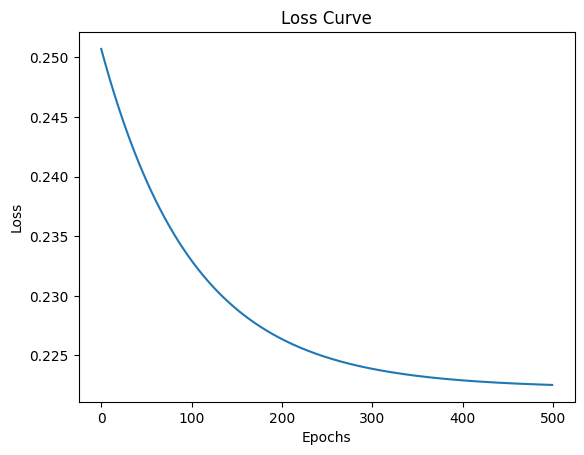

In [6]:
mlp = MLPClassifier(input_size=2, hidden_sizes=[4, 4], output_size=1, learning_rate=0.01, update_step=10)
plotter = DecisionBoundaryPlotter(X, y, interval=10)
mlp.attach_observer(plotter)
losses = mlp.fit(X, y, epochs=500)

plt.figure()
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
y_pred = mlp.predict(X)
accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {accuracy:.2f}")


Final Accuracy: 0.67
